# Clase 5

En esta clase vamos a entender qué son los métodos de regresion, cómo se diferencian de los de clasificación y en qué tareas aplican.

## Motivación:

Supongamos que MercadoLiEbre nos convoca para diseñar un servicio que, a partir de los datos históricos de sus publicaciones inmobiliarias, el sistema aprenda a tasar propiedades basado en sus características. De esta manera, cuando un usuario va a publicar su inmueble, el sistema le sugiera un precio de manera automática.

### ¿Qué diferencia tiene este problema con los vistos hasta ahora?

Hasta el momento vimos problemas de clasificación, donde el objetivo es **clasificar** las instancias en diferentes **categorías**.

Sin embargo, para este problema en particular, lo que queremos es predecir una **cantidad**. Esto es un problema de regresión: aproximar una función real. Algunos ejemplos pueden ser: predecir el precio de una vivienda, la edad de una persona, temperaturas, velocidades, entre otras.

## Error a optimizar

Es importante entender la medida de error que queremos minimizar. En los problemas de clasificación, vimos algunas medidas como precision, recall o accuracy. Sin embargo, en los problemas de regresion estas medidas no aplican. Por ejemplo, la accuracy se define como la cantidad de predicciones correctas del total de predicciones hechas. Sin embargo, como estamos prediciendo un número real, es casi imposible tener predicciones exactas. Necesitamos métricas que de alguna forma penalicen las predicciones que le erraron por mucho y prefieran aquellas cuyo error fue pequeño. A continuación veremos algunas de las medidas que habitualmente se usan y están [disponibles en scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics):

* Error Absoluto Medio ([*Mean Absolute Error*](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)): Es el error en valor absoluto, promediado en todas las instancias. En este caso, todos los errores tienen el mismo peso, ya que se promedia su valor absoluto, sin importar si es grande o chico. Una ventaja de esta métrica es que el error mantiene las unidades en que estamos trabajando. 

$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{ejemplos}}} \sum_{i=0}^{n_{\text{ejemplos}}-1} \left| y_i - \hat{y}_i \right|.$$

  Una variante sencilla de esta métrica consiste en tomar la mediana en vez del promedio, conocido como [Median Absolute Error](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error). Al tomar la Mediana en vez del Promedio, esta métrica es más robusta a los outliers.

* Error Cuadrático Medio ([*Mean Squared Error*](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)): Es el promedio de los errores elevados al cuadrado. En este caso, como se promedian los cuadrados de los errores, los que tengan valores altos van a tener mayor peso que los errores pequeños. esta forma de medir el error no mantiene las unidades, aunque si tomamos la raíz cuadrada de esta métrica, usualmente conocida como RMSE por root mean squared error, sí se mantienen las unidades.
$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{ejemplos}} \sum_{i=0}^{n_\text{ejemplos} - 1} (y_i - \hat{y}_i)^2.$$


* Error Máximo ([*Max Error*](https://scikit-learn.org/stable/modules/model_evaluation.html#max-error)): El error máximo, calcula el peor caso de error entre el valor predicho y el real. Si las predicciones son todas perfectas, el error es 0, aunque en la práctica es improbable que suceda.

$$\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)$$

* R2 score, [coeficiente de determinación](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): Mide la proporción de la variación de resultados explicada por el modelo. La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente malo). Un modelo constante que siempre predice el valor esperado de y ($\bar{y}$), sin tener en cuenta las características de entrada, obtendría una puntuación $R^2$ de 0.0.

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

donde $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ y $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

Usualmente los modelos de scikit que implementan regresiones, disponen de un método `score` que calcula el coeficiente $R^2$.

## Ejercicio:
Implementar las siguientes funciones

In [1]:
import numpy as np

In [8]:
def root_mean_squared_error_clase(y_true, y_pred):
    # completar aqui
    result = np.zeros_like(y_true)
    result = (1/y_true.size)*sum((y_true - y_pred)**2)
    return result

def r2_score_clase(y_true, y_pred):
    # completar aqui
    result = np.zeros_like(y_true)
    result = 1-(sum((y_true-y_pred)**2))/((sum((y_true-np.mean(y_true))**2)))
    return result

Verifiquemos que la implementación sea correcta. Para esto vamos a calcular el RMSE y $R^2$ con nuestra implementación y con sklearn, y verificar que ambas arrojan el mismo resultado.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_true = np.random.uniform(size=100)
y_pred = np.random.uniform(size=100)

# Calcular ambos valores con ambas alternativas
# completar aqui
rmse_skit = np.zeros_like(y_true)
rmse_skit = mean_squared_error(y_true, y_pred)
rmse_clase = np.zeros_like(y_true)
rmse_clase = root_mean_squared_error_clase(y_true, y_pred)


r2_skit = np.zeros_like(y_true)
r2_skit = r2_score(y_true, y_pred)
r2_clase = np.zeros_like(y_true)
r2_clase = r2_score_clase(y_true, y_pred)
# -----------------

# Usamos la instruccion assert para verificar que este todo ok.
# Si no se cumple la desigualdad, arroja un error con el mensaje dado.
# assert condicion, "mensaje_de_error"
assert abs(rmse_skit - rmse_clase) <= 1e-8, '{} - {}'.format(rmse_skit, rmse_clase)
assert abs(r2_skit - r2_clase) <= 1e-8, '{} - {}'.format(r2_skit, r2_clase)

## Boston House Pricing Dataset
Para pasar a la parte práctica, vamos a utilizar el [Boston House Pricing Dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), que viene disponible en sckit.

Comenzamos por importar las librerías necesarias:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()
print("Los atributos son los siguientes:\n\t" + ", ".join(boston.feature_names))

Los atributos son los siguientes:
	CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT


Veamos la descripción del dataset:

In [11]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Construimos, como de costumbre, el conjunto de entrenamiento y el de test.
Tomar el 25% del conjunto para test, y el 80% para entrenar. Los atributos para las instancias se encuentran en `boston.data` y sus correspondientes objetivos en `boston.target`.

In [23]:
# completar aqui
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

print('X_train shape: ' + str(X_train.shape))
print('X_test shape: '  + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: '  + str(y_test.shape))

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [24]:
from matplotlib.figure import figaspect

def plot_selected_features(feature_selector, feature_names, X_train, y_train):
    """
    Graficamos los mejores atributos seleccionados según el SelectKBest.
        X_train: matriz de atributos, (n_samples, n_features)
        y_train: vector con los targets
        feature_selector: instancia de SelectKBest entrenada
        feature_names: numpy array, (n_features,) que contiene el nombre de los atributos
    """
    # Obtenemos los nombres de los atributos que fueron seleccionados por el feature selector dado
    selected_features = feature_names[feature_selector.get_support()]
    # Obtenemos los atributos seleccionados por el feature selector dado
    X_new = feature_selector.transform(X_train)
    
    sorted_idx=np.argsort(feature_selector.scores_)

    # Mostramos cada atributo del dataset con su score correspondiente y si fue o no seleccionado
    print('atributo:  score -> seleccionada\n')
    for support, score, name in zip(feature_selector.get_support()[sorted_idx], feature_selector.scores_[sorted_idx], feature_names[sorted_idx]):
        print('{:>8}: {:6.2f} -> {}'.format(name, score, support))

    # Creamos los k subplots
    fig, axes = plt.subplots(1, feature_selector.k, sharey=True, sharex=False)

    # Calculamos los limites del plot
    x_min, x_max = X_new.min() - .5, X_new.max() + .5
    y_min, y_max = y_train.min() - .5, y_train.max() + .5
    
    # Configuramos el tamaño para los subplots
    w, h = figaspect((y_max-y_min)/(feature_selector.k*(x_max-x_min)))
    fig.set_size_inches(w, h)

    # Recorremos los atributos seleccionados y cada uno lo ponemos ne un eje distinto
    for i, feature in enumerate(selected_features):
        
        if i == 0:
            # Agregamos la etiqueta solamente en el primer sub plot
            axes[i].set_ylabel('Median house value')
        
        axes[i].set_xlabel(feature)
        axes[i].set_xlim(x_min, x_max)
        axes[i].set_ylim(y_min, y_max)
        axes[i].scatter(X_new[:,i],y_train)
        
    plt.tight_layout()
    plt.show()
    plt.clf()

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression

A continuación, usando el selector de atributos [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) de scikit, tomar las mejores cuatro características para este conjunto de datos, y luego graficarlas utilizando la función `plot_selected_features`.

atributo:  score -> seleccionada

    CHAS:  15.16 -> False
     DIS:  23.52 -> False
      ZN:  42.59 -> False
       B:  52.52 -> False
     AGE:  52.62 -> False
    CRIM:  66.62 -> False
     RAD:  71.01 -> False
     NOX:  84.01 -> False
     TAX: 107.77 -> False
   INDUS: 114.32 -> True
 PTRATIO: 127.84 -> True
      RM: 410.23 -> True
   LSTAT: 476.34 -> True


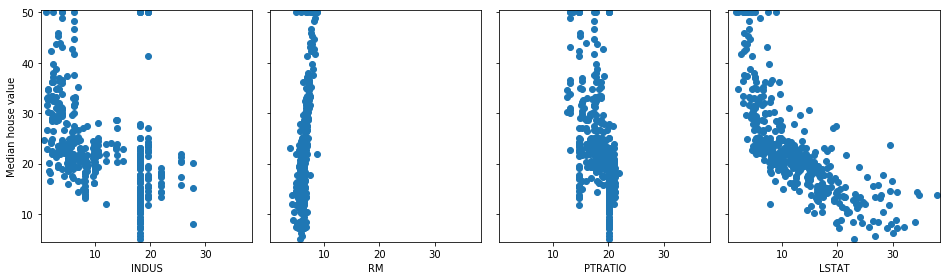

In [77]:
# completar aqui
feature_selector = SelectKBest(f_regression, k=4).fit(X_train, y_train)
# ------------------------------------------
# verificamos que el feature_selector elije 4 atributos
assert feature_selector.transform(X_train).shape[1] == 4
# X_train debe contener TODOS los atributos
plot_selected_features(feature_selector, boston.feature_names, X_train, y_train)

En tareas de regresion, es muy importante normalizar los datos, por ejemplo, para evitar que los atributos con valores absolutos grandes, tengan demaciada incidencia en el resultado final. Utilizando el [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de sckit-learn, normalizar los atributos para que tengan media -0 y desviación estándar uno.

In [131]:
# completar aqui
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(feature_selector.transform(X_train))
y_train_scal = y_train
# ------------------------------------------

ValueError: X has a different shape than during fitting.

# Regresión lineal

El primer modelo que vamos a ver es de regresión lineal. Esto es, si nuestras instancias X son de la forma $x_0, x_1, \ldots, x_n$, podemos utilizar una aproximación lineal de la siguiente forma:

$$\hat{y}(w,x) = b + x_1 w_1 + \ldots + x_n w_n $$

Donde $b$ es simplemente el término independiente, usualmente conocido como _bias_. Muchas veces se simplifica este término en la notación, añadiendo un $x_0=1$, y renombrando $b$ con $w_0$.  Con este cambio, podemos escribirlo matricialmente de la siguiente manera:

$$ \hat{y} = Xw $$

Este modelo es muy sencillo pero muchas veces es útil en la práctica. El problema que debemos resolver es encontrar los pesos que minimizan el error para el conjunto de datos.

In [91]:
from sklearn.model_selection import KFold, cross_val_score

Aprovechando que sckit tiene sus interfaces estandarizadas, podemos escribir una función que reciba un objeto `clf` de tipo *regression estimator* (esto es, que permite entrenar una regresión), `X_train` e `y_train` y estime el valor del error mediante validación cruzada con cinco _folds_. Reportar el promedio y la desviacion estandar del error.

In [92]:
import statistics

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coeficiente de determinacion en el conjunto de entrenamiento: {:.3f}".format(clf.score(X_train, y_train)))
    
    # ---- COMPLETAR ----
    X = cross_val_score(clf, X_train, y_train, cv=5)
    
    mean_score = statistics.mean(X)
    std_score = statistics.stdev(X)
    # -------------------
    print ("Coeficiente de determinacion en el conjunto de entrenamiento con 5-fold crossvalidation:\n" +
           "{:.3f} ± {:.3f}".format(float(mean_score), float(std_score)))

Para verificar la implementación, vamos a entrenar un objeto llamado LinearRegression del módulo sklearn.linear_model. Este regresor implementa mínimos cuadrados, esto es, encuentra los pesos $w_i$ de la siguiente forma:

$$\min_{w} || X w - y||_2^2$$

In [93]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
train_and_evaluate(clf, X_train_scal, y_train_scal)

Coeficiente de determinacion en el conjunto de entrenamiento: 0.687
Coeficiente de determinacion en el conjunto de entrenamiento con 5-fold crossvalidation:
0.668 ± 0.076


Scikit-learn provee un módulo entero con distintas alternativas para implementar regresiones lineales, llamado [sklearn.linear_model](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net).

Al igual que los clasificadores vistos hasta el momento, implementan los métodos `fit`, `predict` y `score`, pero además, en el caso de los modelo lineales, tienen dos atributos muy útiles: `coef_` para obtener el vector $w_1 w_n$, y `intercept_` para obtener el término independiente $w_0$.

Estos valores son muy importantes a la hora de interpretar el modelo para entender qué está aprendiendo nuestro modelo, y a qué le está dando relevancia.

A continuación, vamos a escribir una función genérica que, dado un regresor lineal, nos muestre sus pesos, ordenados según su importancia.
Sugerencia: utilizar la función `plt.bar` de [matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html).

In [96]:
def mostrar_pesos(clf, feature_names):
    # ---- COMPLETAR ----
    cant_features = clf.coef_.size
    plt.bar(range(1,cant_features+1), np.sort(clf.coef_), tick_label=feature_names)
    # ordenar labels

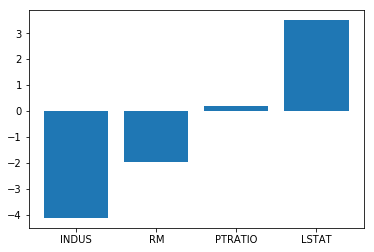

In [97]:
selected_features = boston.feature_names[feature_selector.get_support()]
mostrar_pesos(clf, selected_features)

Dado un regresor entrenado, utilizando sus atributos `coef_` para obtener el vector $w_1 w_n$, y `intercept_` para el $w_0$, verificar que todos los estimados por el clasificador son exactamente iguales a calculados manualmente a partir de dichos coeficientes.

In [107]:
def regresion_manual(clf, X):
    # ---- COMPLETAR ----
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        y_pred[i] = np.sum(clf.coef_*X[i,:])+clf.intercept_
    return y_pred

# Verificamos que ambas estimaciones dan lo mismo
y_pred_clase = regresion_manual(clf, X_train_scal)
y_pred_scikit = clf.predict(X_train_scal)

assert np.sum(np.abs(y_pred_clase - y_pred_scikit)) <= 1e-7

Verificar que las funciones desarrolladas (`train_and_evaluate`, `mostrar_pesos`, y `regresion_manual`) tambien funcionan correctamente para los modelos lineales [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) y [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Coeficiente de determinacion en el conjunto de entrenamiento: 0.668
Coeficiente de determinacion en el conjunto de entrenamiento con 5-fold crossvalidation:
0.650 ± 0.051
Coeficiente de determinacion en el conjunto de entrenamiento: 0.687
Coeficiente de determinacion en el conjunto de entrenamiento con 5-fold crossvalidation:
0.668 ± 0.076
7.46069872548e-14
1.24344978758e-13


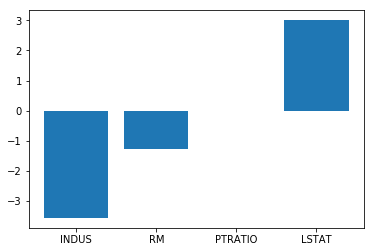

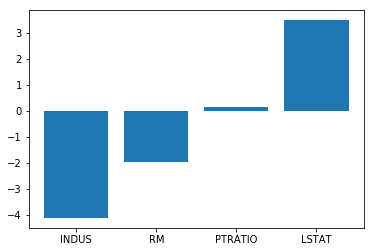

In [112]:
from sklearn.linear_model import Lasso, Ridge
# ---- COMPLETAR ----
clf_lasso = linear_model.Lasso()
clf_ridge = linear_model.Ridge()

train_and_evaluate(clf_lasso, X_train_scal, y_train_scal)
train_and_evaluate(clf_ridge, X_train_scal, y_train_scal)

mostrar_pesos(clf_lasso, selected_features)
plt.figure()
mostrar_pesos(clf_ridge, selected_features)

y_pred_clase = regresion_manual(clf_lasso, X_train_scal)
y_pred_scikit = clf_lasso.predict(X_train_scal)
print(np.sum(np.abs(y_pred_clase - y_pred_scikit)))
y_pred_clase = regresion_manual(clf_ridge, X_train_scal)
y_pred_scikit = clf_ridge.predict(X_train_scal)
print(np.sum(np.abs(y_pred_clase - y_pred_scikit)))

## Regresión polinómica

Con modelos lineales, únicamente se pueden aprender relaciones lineales entre los datos. Sin ambargo, se pueden combinar los atributos entre sí. Scikit-learn implementa la clase [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que genera automáticamente combinaciones polinómicas de los atributos. Por ejemplo, a partir de los atributos $ x_1, x_2$, se puede obtener los polinomios de hasta segundo grado, que son los siguientes:

$$1, x_1, x_2, x_1^2, x_1x_2, x_2^2$$

A continuación, entrenar un clasificador lineal incluyendo atributos polinómicos, de orden 2 o menor, tomando los mejores 4 de todas las combinaciones.

In [126]:
from sklearn.preprocessing import PolynomialFeatures

# ---- COMPLETAR ----
poli = PolynomialFeatures(2, include_bias=False)
X_train_poli = poli.fit_transform(X_train_scal)

feature_selector = SelectKBest(f_regression, k=4).fit(X_train_poli, y_train)
# ------------------------------------------
# verificamos que el feature_selector elije 4 atributos
assert feature_selector.transform(X_train_poli).shape[1] == 4

atributo:  score -> seleccionada

    x0^2:   0.00 -> False
   x0 x2:   2.01 -> False
   x2 x3:   2.24 -> False
    x3^2:  13.65 -> False
   x1 x3:  14.77 -> False
   x0 x1:  15.97 -> False
   x0 x3:  18.82 -> False
    x2^2:  18.82 -> False
    x1^2:  78.88 -> False
   x1 x2:  84.71 -> False
      x0: 114.32 -> True
      x2: 127.84 -> True
      x1: 410.23 -> True
      x3: 476.34 -> True


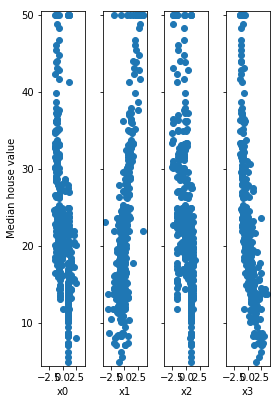

In [127]:
plot_selected_features(feature_selector, np.array(poli.get_feature_names()), X_train_poli, y_train)

## Vecinos más cercanos

Este método es muy sencillo, consiste en estimar el valor de la función en cada punto, a partir de una aproximaciòn local a dicho punto. En su versión más sencilla, [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) toma los $k$ puntos más cercanos, y los promedia. 

Una variante sencilla, consiste en tomar todos los puntos que estén a menos de $r$, y promediar su valor. Esto lo implementa [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier).

Entrenar un regresor [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Encontrar un buen valor de $k$ y verificar si ponderar el promedio con distancias (`weights='distance'`) es mejor que no hacerlo (`weights='uniform'`).

In [ ]:
# ---- COMPLETAR ----
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(5, weights='uniform')
knr.fit(X_train_scal, y_train)
print(knr.score(X_test_scal, y_test))
knr_D = KNeighborsRegressor(5, weights='distance')
knr_D.fit(X_train_scal, y_train)
knr_D.score(X_test_scal, y_test)

Considerar que hasta el momento, para entrenar el regresor pasamos por varios pasos:
 * 1) Elegimos los mejores k atributos
 * 2) Normalizamos (forzamos media 0, desviación estándar 1)
 * 3) Agregamos todos los atributos polinómicos y nos quedamos con algunos (opcional)
 * 4) Entrenamos el regresor sobre los atributos restantes
 
Para poner todos los pasos juntos, se puede definir un [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de scikit: esto simplemente es un objeto donde se le indican uno a uno los pasos a seguir.

Para la mejor configuración encontrada durante toda la clase, definir el pipeline correspondiente, evaluar los resultados en el conjunto de test. Reportar el RMSE.

In [ ]:
from sklearn.pipeline import Pipeline
# ---- COMPLETAR ----
pass
# -------------------

**opcional**: aplicando las estrategias [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) o [RandomizedSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) se puede seleccionar hiperparámetros para todo el pipeline definido.

Encontrar una buena configuración de parámetros para el pipeline definido en la parte anterior. Evaluarlo en el conjunto de test y compararlo con los esultados encontrados manualmente.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# ---- COMPLETAR ----
pass
# -------------------

Por último, utilizando las herramientas vistas en clase, implementar un regresor que ajuste correctamente los datos del [diabetes_dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
# ---- COMPLETAR ----
pass
# -------------------